In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Transformed_Housing_Data2.csv")

In [5]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)

In [6]:
sample_data =  pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


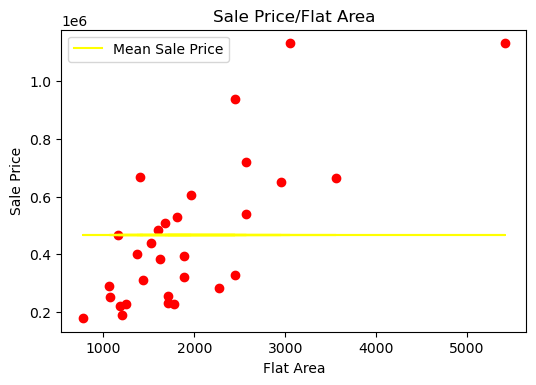

In [5]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()
plt.figure(dpi = 100)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color= 'yellow', label = 'Mean Sale Price')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat Area')
plt.legend()
plt.show()
# Mean regression model gives same sale price for every area of the house whether is larger or smaller, which is not true in reality. 

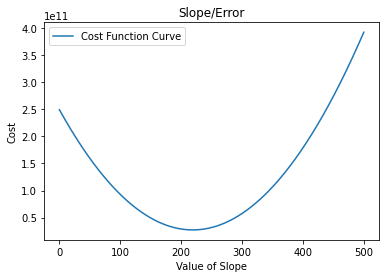

In [50]:
from sklearn.metrics import mean_squared_error as mse
def slope_Error(slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE
slope=[i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost=slope_Error(slope=i, intercept=36296, sample_data = sample_data)
    Cost.append(cost)
# Arranging in Dataframe
Cost_table = pd.DataFrame({'slope': slope, 'Cost': Cost})
Cost_table.tail()
# Plotting the cost values corresponding to the every value of slope
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of Slope')
plt.ylabel('Cost')
plt.title('Slope/Error')
plt.legend()
    

In [51]:
new_slope = Cost_table['slope'][Cost_table['Cost']==Cost_table['Cost'].min()].values
new_slope[0]

219.0

In [ ]:
from sklearn.metrics import mean_squared_error as mse
def intercept_Error(slope, intercept, sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i]*slope+intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE
intercept=[i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost=intercept_Error(slope=219, intercept=i, sample_data = sample_data)
    Cost.append(cost)
# Arranging in Dataframe
Cost_table = pd.DataFrame({'intercept': intercept, 'Cost': Cost})
Cost_table.tail()
# Plotting the cost values corresponding to the every value of slope
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of Intercept')
plt.ylabel('Cost')
plt.title('Intercept/Error')
plt.legend()
    

In [ ]:
new_intercept = Cost_table['intercept'][Cost_table['Cost']==Cost_table['Cost'].min()].values
new_intercept[0]

In [1]:
def param_init(y):
    # y = target variable
    # returns intialized valuees of m & c
    m = 0.1
    c=y.mean()
    return m,c

In [2]:
def generate_predictions(m,c,x):
    # x = independent variable
    # returns prediction generated by line with parameters m,c
    prediction = []
    for x in x:
        pred = (m*x)+c
        prediction.append(pred)
    return prediction    

In [7]:
def compute_cost(prediction,y):
    #returns the mse between prediction and y
    cost = np.sum(((prediction-y)**2)/len(y))
    return cost

In [8]:
# For gradients
def gradients (prediction,y,x):
    #returns gradients corresponding to m & c
    n = len(y)
    Gm = 2/n*np.sum((prediction-y)*x)
    Gc = 2/n*np.sum(prediction-y)
    return Gm, Gc

In [9]:
# Updating parameters using Gm and Gc
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
    #update and return new values of m and c 
    m_new = m_old-alpha*Gm_old
    c_new = c_old-alpha*Gc_old
    return m_new, c_new

In [10]:
def result(m,c,x,y,cost,predictions,i):
    # print and plot final results obtained from gradient descent
    #if Gradient descent gradient is converged to optimum before max_iter
    if i<max_iter-1:
        print("*****Gradient descent has converged at iteration{}*****",format(i))
    else: 
        print("*****Result after",max_iter,'iterations is*****')
    #plotting final results 
    plt.figure(figsize = (14,7),dpi = 120)
    plt.scatter(x,y,color='red',label='data points')
    label = 'final regression line: m={};c={}'.format(str(m),str(c))
    plt.plot(x,predictions,color='green',label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()

*****Result after 1000 iterations is*****


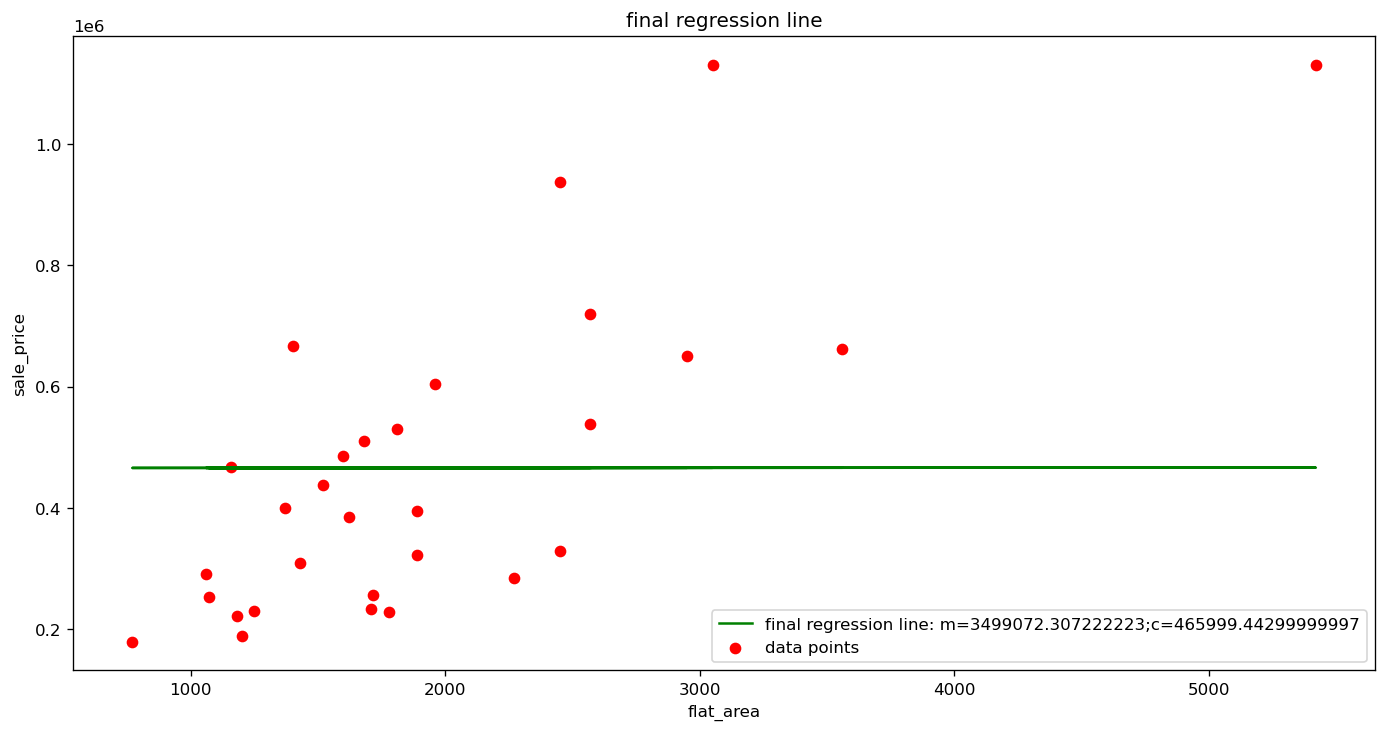

In [32]:
# defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)
#declaring parameters
max_iter = 1000
alpha = 0.01
cost_old = 0
# Step 1: intializing values of m,c
m,c = param_init(sale_price)
#Gradient Descent in action
for i in range(0,max_iter):
    # Step 2: Generating predictions
    predictions = generate_predictions(m,c,flat_area)
#Step 3: calculating cost
    cost_new = compute_cost(predictions, sale_price)
#checking if Gd is converged
    if abs(cost_new - cost_old)<10**(-7):
        break
    

#calculating gradients
Gm,Gc = gradients(predictions,sale_price,flat_area)
#Step 4: updating parameters m and c
m,c = param_update(m,c,Gm,Gc,alpha)
#display result after every 20 iterations 
if i%20 == 0:
    print('After Iteration',i,':m=',m,':c=',c,':Cost=',cost_new)
#updating cost_old
    cost_old = cost_new
#final results
result(m,c,flat_area,sale_price,cost_new,predictions,i)
    

*****Result after 1000 iterations is*****


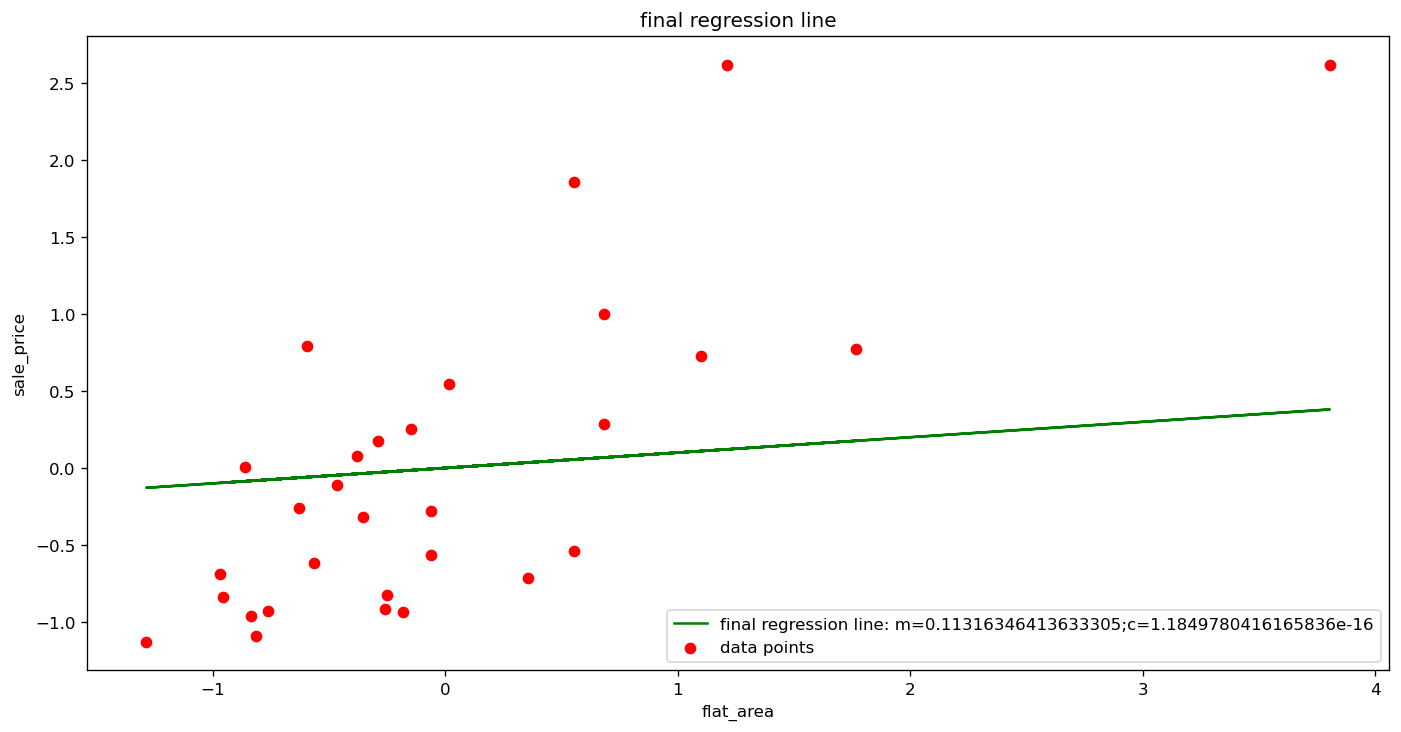

In [33]:
# defining and reshaping the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))
#declaring parameters
max_iter = 1000
alpha = 0.01
cost_old = 0
# Step 1: intializing values of m,c
m,c = param_init(sale_price)
#Gradient Descent in action
for i in range(0,max_iter):
    # Step 2: Generating predictions
    predictions = generate_predictions(m,c,flat_area)
#Step 3: calculating cost
    cost_new = compute_cost(predictions, sale_price)
#checking if Gd is converged
    if abs(cost_new - cost_old)<10**(-7):
        break
    

#calculating gradients
Gm,Gc = gradients(predictions,sale_price,flat_area)
#Step 4: updating parameters m and c
m,c = param_update(m,c,Gm,Gc,alpha)
#display result after every 20 iterations 
if i%20 == 0:
    print("After Iteration",i,":m=",m,":c=",c,":Cost=",cost_new)
#updating cost_old
    cost_old = cost_new
#final results
result(m,c,flat_area,sale_price,cost_new,predictions,i)
    